<center><font size='6'><b>Midterm Exam</b></font></center>
<p>
<center><font size='4'><b>HSE 545: Machine Learning</b></font></center>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 80% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 16%>
            by Seungchul Lee
        </td>
    </tr>
</table>


# Problem 1

Let $R = R(\theta)$ be a rotation matrix with a rotational angle of $\theta$ in $\mathbb{R}^n$.

1. Prove that $$R^TR=I \;\text{in}\; \mathbb{R}^n$$
    
    Hint: Euclidian distances of vectors are preserved after a rotational operation. (_i.e._, $\lVert Rx \rVert = \lVert x \rVert$ for any $x \in \mathbb{R}^n$ ) 
<br><br>
2. Prove that $$R^T(\theta) = R^{-1}(\theta) = R(-\theta)\;\text{in}\;\mathbb{R}^n$$
<br><br>
3. Show that column vectors in $R$ are orthogonal in $\mathbb{R}^n$.

# Problem 2

1. Define $f: \mathbb{R}^n \to \mathbb{R}^n$ as the projection of vector $x$ onto vector $y$. The projection operation is illustrated in Figure 1. Find matrix $P$ when $f(x)=Px$.
<br><br>
2. Define $g: \mathbb{R}^n \to \mathbb{R}^n$ as the reflection of vector $x$ about vector $y$. The reflection operation is also illustrated in Figure 1. Express matrix $A$ using matrix $P$ when $g(x)=Ax$.

<img src="./image_files/projection_mirror.png", width = 250>
<center>Figure 1</center>

# Problem 3

Find solution $D$ of the optimization problem with the following objective function and constraints. Here, $\lVert \cdot \rVert_2$ is the Euclidean norm (or distance). 

<br><br>
$$\begin{align*} D= \min_Z \quad
& \lVert X_1 - Z \rVert_2 + \lVert X_2 - Z \rVert_2 \\ \\
\text{subject to} \quad
& Z \in V=\text{span} \{V_1, V_2\}
\end{align*}$$

<img src="./image_files/mirrored_line.png", width = 300>
<center>Figure 2</center>

# Problem 4

We saw many optimization problems in a machine learning context and witnessed that $L_1$ norm reguarlization provides not only small, but also sparse decision variables. In this problem we will use a linear programming to solve $L_1$ norm optimization problems instead of simply using cvx.

1) Show that 

$$ \lvert y_i \rvert = \max \left(-y_i,y_i \right) $$

2) Show that, by introducing slack variable $t_i$, the absolute value optimization problem can be coverted to

<table style="border-style: hidden; border-collapse: collapse;" width = "60%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
        $$ \min \,\lvert y_i \rvert = \min \left\{\max \left(-y_i,y_i \right) \right\} $$          
        </td>
        <td width = 10% style="border-style: hidden; border-collapse: collapse;">
             $$ \iff $$
        </td>
        <td width = 20%>
$$
\begin{align}
\min \quad & t_i  \\
\text{subject to} \quad 
& y_i \leq t_i \\
& -y_i \leq t_i 
\end{align}
$$ 
        </td>
    </tr>
</table>


3) Suppose $A\theta-b = r$ and $t = \begin{bmatrix} t_1 & t_2 & \cdots & t_m \end{bmatrix}^T $, then show that $L_1$ norm fitting/approximation problem, _i.e._, sum of (absolute) residuals can be coverted to


<table style="border-style: hidden; border-collapse: collapse;" width = "65%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 30% style="border-style: hidden; border-collapse: collapse;">
        $$ \min \,\lVert A\theta-b \rVert_{1}  = \min \,\sum_{i} \,\lvert r_i \rvert = \min \,\sum_{i} \, \max \left(-r_i,r_i \right) $$
        </td>
        <td width = 10% style="border-style: hidden; border-collapse: collapse;">
             $$ \iff $$
        </td>
        <td width = 25%>
$$
\begin{align}
\min \quad & t_1 + \cdots + t_m \\
\text{subject to} \quad 
& A\theta - b \leq t \\
& -(A\theta - b) \leq t 
\end{align}
$$
        </td>
    </tr>
</table>

 
4) Change the LP in matrix form where $\mathbb{1} = \begin{bmatrix} 1& \cdots & 1\end{bmatrix}^T$ and $\mathbb{0} = \begin{bmatrix} 0& \cdots & 0\end{bmatrix}^T$

$$
\begin{align}
\min \quad & \begin{bmatrix} \mathbb{0}^T & \mathbb{1}^T \end{bmatrix} \begin{bmatrix} \theta \\ t \end{bmatrix} \\
\text{subject to} \quad 
& \begin{bmatrix} A & -I \\ -A & -I \end{bmatrix}\begin{bmatrix} \theta \\ t \end{bmatrix} 
\leq \begin{bmatrix} b \\ -b \end{bmatrix}
\end{align}
$$

5) Use LP in Matlab (or python) to find and plot a robust linear regression for data points with outliers

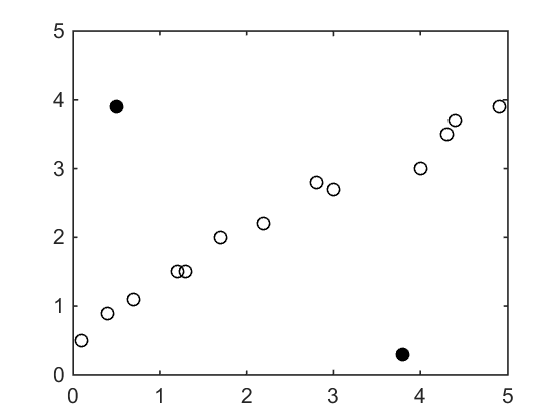

In [4]:
% matlab
% outlier example

x = [0.1 0.4 0.7 1.2 1.3 1.7 2.2 2.8 3.0 4.0 4.3 4.4 4.9]';
y = [0.5 0.9 1.1 1.5 1.5 2.0 2.2 2.8 2.7 3.0 3.5 3.7 3.9]';

% add outliers
x = [x; 0.5; 3.8];
y = [y; 3.9; 0.3];

plot(x,y,'ko'), hold on
plot(x(end-1:end),y(end-1:end),'ko','markerfacecolor','k'), ylim([0 5])

%% code here

# Problem 5

The regularized least-squares problem has the form

<br>
$$ \min_{\theta} \;\lVert A\theta -y\rVert_2^2 + \lambda \lVert \theta \rVert_2^2$$

1. Show that the solution is given by
<br><br>
$$ \hat{\theta} = \left( A^T A + \lambda I_n \right)^{-1} A^T y $$
 (Do not use the method of Lagrangian multipliers)
<br><br>
2. Find and draw an approximated curve of the given data points in either Matlab or python
    - overcome overfitting 
    - use RBF 
    - choose a proper value of $\lambda$ on your own
    

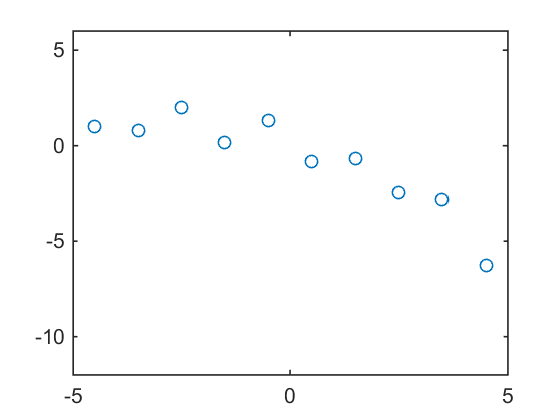

In [6]:
x = -4.5:1:4.5;
x = x(:);

y = [0.9819 0.7973 1.9737 0.1838 1.3180 -0.8361 -0.6591 -2.4701 -2.8122 -6.2512]';
plot(x,y,'o'), axis([-5 5 -12 6])

# Problem 6

In this problem we will refer to the binary classification task depicted in Figure 3, which we attempt to solve with the simple linear logistic regression model

$$ P(y = +1 \mid x,\omega_1, \omega_2) = g(\omega_1 x_1 + \omega_2 x_2) = \frac{1}{1+\exp(-\omega_1 x_1 - \omega_2 x_2)}$$

(For simplicity we do not use the bias parameter $\omega_0$ or think as $\omega_0 = 0$). The training data can be separated with zero training error – see line $L_1$ in Figure 4 for instance.

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/classification_1.png", width = 300>
            <center>Figure 3</center>
        </td>
        <td width = 45%>
            <img src="./image_files/classification_2.png", width = 300>
            <center>Figure 4</center>
        </td>
    </tr>
</table>

1. Consider a regularization approach where we want to minimize 
<br><br>
$$ \sum_{i=1}^{m}\log P\left( y_i \mid x_i,\omega_1, \omega_2\right) + \lambda \,\omega_2^2 $$
<br>
Note that only $\omega_2$ is penalized. We want to know which of the four lines in Figure 4 could arise as a result of such regularization. For each potential line $L_2$, $L_3$, or $L_4$, determine whether it can result from regularizing $\omega_2$. 
<br><br>
2. If we change the form of regularization to one-norm (absolute value) we get the following penalized log-likelihood
<br><br>
$$ \sum_{i=1}^{m}\log P\left( y_i \mid x_i,\omega_1, \omega_2\right) + \lambda \,\left( \lvert \omega_1 \rvert + \lvert \omega_2 \rvert \right)$$
<br>
Consider again the problem in Figure 4 and the same linear logistic regression model. As we increase the regularization parameter $\lambda$, which of the following scenarios do you expect to observe (choose only one)
<br><br>
a) First $\omega_1$ will become 0, then $\omega_2$ 
<br>
b) $\omega_1$ and $\omega_2$ will become zero simultaneously
<br>
c) First $\omega_2$ will become 0, then $\omega_1$ 
<br>
d) None of the weights will become exactly zero, only smaller as $\lambda$ increases.



$\;\,\, $3\. To double check your answers, let's do it in Matlab. You can include $\omega_3$ to re-use Matlab files given in class. 

$$ 
\begin{align*}
\omega &= \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3\end{bmatrix}, \quad x = \begin{bmatrix} x_1 \\ x_2 \\ 1\end{bmatrix}
\end{align*}
$$

$$ P(y = +1 \mid x,\omega_1, \omega_2, \omega_3) = g(\omega_1 x_1 + \omega_2 x_2 + \omega_3) = \frac{1}{1+\exp(-\omega_1 x_1 - \omega_2 x_2 - \omega_3)}$$

$$ \sum_{i=1}^{m}\log P\left( y_i \mid x_i,\omega_1, \omega_2, \omega_3\right) + \lambda \,\omega_2^2 $$

$$ \sum_{i=1}^{m}\log P\left( y_i \mid x_i,\omega_1, \omega_2, \omega_3\right) + \lambda \,\left( \lvert \omega_1 \rvert + \lvert \omega_2 \rvert + \lvert \omega_3 \rvert \right)$$

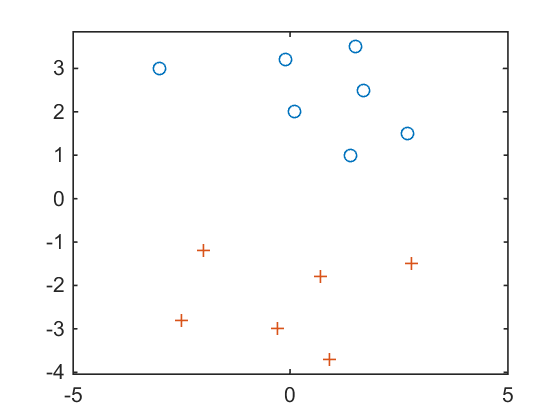

In [11]:
X = [-3.0  3.0;
     -0.1  3.2;
      0.1  2.0;
      1.5  3.5;
      1.7  2.5
      1.4  1.0;
      2.7  1.5;
     -2.5 -2.8;
     -2.0 -1.2;
     -0.3 -3.0;
      0.7 -1.8;
      0.9 -3.7;
      2.8 -1.5];

x1 = X(:,1);
x2 = X(:,2);

y = [ones(7,1); -ones(6,1)]; 

plot(x1(1:7),x2(1:7),'o',x1(8:end),x2(8:end),'+'), axis equal, xlim([-5 5])

%% code here for 1)
% use square(x) for x^2 in cvx and set g (lambda) = 40

%% code here for 2)

Download this data(audio_recording)

<a href = "https://www.dropbox.com/sh/wo7l4a1hu4314yr/AAAoZUzwqg8eLpGbXbJjTkcia?dl=0"> data_set </a>



# Problem 7

Robert is a suspect of a serial murder case. FBI is wiretapping several possible phone lines in order to identify his location. However, there are not many FBI agencies available to continuously monitor all the lines. Therefore, FBI asks HSE545 students to develop an autonomous audio recognition system. In this special case, FBI wants to know when the sound of ‘Robert’ occurs over a recorded phone conversation.  

1) Consider two time signals $x$ and $y$. Both can be represented as a form of column vector. Write down the inner product of two signal $x$ and $y$, and meaning of it.
<br><br>
$$ x = 
\begin{bmatrix}x[1]\\x[2]\\\vdots\\x[m] \end{bmatrix},\quad y=\begin{bmatrix} y[1]\\y[2]\\\vdots\\y[m]\end{bmatrix}$$

In [5]:
load([pwd,'\image_files\audio_recording.mat']);
whos

Name           Size              Bytes  Class     Attributes

  fs             1x1                   8  double              
  x         142000x1             1136000  double              
  y          10300x1               82400  double

You can hear the sound using MATLAB command `soundsc(y,fs)`.

In [6]:
soundsc(x,fs);

In [7]:
soundsc(y,fs);  % 'Robert'

2) Now we want to create a sound recognition (or audio detection) system using the above concepts (here, use the inner product). Write a code to find when the sound of 'Robert' occurs in signal $x$. Note that lengths of two signals are different.

Hint: Think about correlation (or inner product) when two signals are similar
<img src="./image_files/sound_signal_2.png", width = 400>
<center>Figure 5</center>

In [4]:
%% audio detection

% write your own code here

Download this data(reg_pca_data)

<a href = "https://www.dropbox.com/sh/0gdcxfqeq4akp6r/AABKnGH7lKxTBNquokTcpNrSa?dl=0"> data_set </a>


# Problem 8

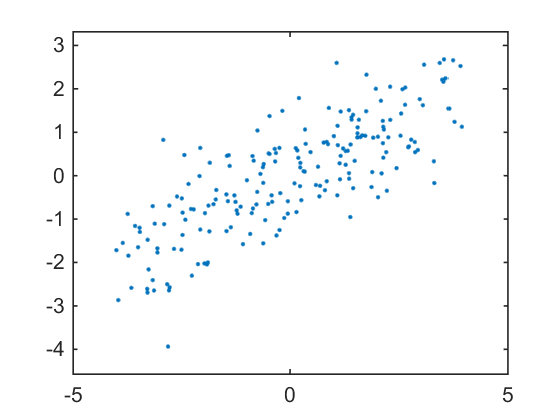

Name        Size            Bytes  Class     Attributes

  x         200x1              1600  double              
  y         200x1              1600  double

In [11]:
clear all
load([pwd,'\image_files\reg_pca_data.mat']); 
whos

plot(x,y,'.')
axis equal
xlim([-5 5])

1. Write a m-code or python code to conduct a linear regression (least square). 
<br><br>
2. Write a m-code or python code to perform PCA. Since `mean(x) = mean(y) = 0`, normalization step (mean subtraction and rescaling) can be skipped.
<br><br>
3. Comment on why the results are different as shown in Figure 6? 

<img src="./image_files/pca_regression.png", width = 400>
<center>Figure 6</center>

Download this data(pca_classification_data)

<a href = "https://www.dropbox.com/sh/xsebrsqxe79g3n0/AAAbwQYsaDF-TkORU5e9KVFqa?dl=0"> data_set </a>



# Problem 9

PCA can be used for dimensionality reduction. We want to explore this with the following data set: two variables (‘data’ and ‘group’) in the workspace. The variable of ‘data’ has five features, and we want to reduce the number of features using PCA. However, we are not sure about the appropriate number of reduced features. 

In [12]:
clear all
load([pwd,'\image_files\pca_classification_data.mat']); 
whos

Name         Size            Bytes  Class     Attributes

  data       200x5              8000  double              
  group      200x1              1600  double

1. Write a m-code or python code to determine the appropriate number of reduced features. You have to justify your answer. 
<br><br>
2. Apply SVM to the new data (which has reduced features) for classification, and plot your results.
<br><br>
3. Apply the perceptron algorithm to the new data for classification, and plot your results.